Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Молодец, что не забыла про вывод. Он очень хорошо оформлен и наполнен хорошим содержанием.
* Отлично, что ты исключил стоп-слова при векторизации!
* Работа получилась очень хорошей, тебе удалось добиться достаточно хорошего качества. Поздравляю!
* Проект зачтен, удачи в дальнейшем обучении!

<br/><font size="6"><b>Работа с текстом. Токсичные комментарии.</b></font>.<br/>

<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [0. Подгрузка библиотек и самописные функции](#0.)
* [1. Подготовка данных](#1.)
* [2. Обучение](#2.)
* [3. Тестирование и Проверка модели на адекватность](#3.)
* [Вывод](#5.)
* [Приложение. А как же BERT?](#6.)

# Описание проекта

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

## Инструкция по выполнению проекта

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

## Описание данных

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<a name="0."></a><br/>
<font size="6"><b>0. Подгрузка библиотек и самописные функции</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
#!pip install xgboost
#!pip install -U yellowbrick

import nltk
nltk.download('wordnet')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from termcolor import colored

import warnings
import time
import scipy.stats as st
import random
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.exceptions import NotFittedError
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.dummy import DummyClassifier
from statsmodels.tsa.seasonal import seasonal_decompose
import torch
import transformers
from tqdm import notebook

from sklearn.model_selection import cross_val_score
from sklearn.metrics  import f1_score
from sklearn.metrics  import precision_score
from sklearn.metrics  import recall_score
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from time import time
import re
import sys
import csv
#csv.field_size_limit(sys.maxsize)
from matplotlib import rcParams
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
import datetime
import pprint
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from collections import  Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import PassiveAggressiveClassifier
import transformers as ppb
%matplotlib inline
from matplotlib import pyplot as plt

[nltk_data] Downloading package wordnet to /Users/lesia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lesia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lesia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/lesia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
#Определяем болд
def bold(): 
    return "\033[1m"

def bold_end(): 
    return "\033[0m"

#Ставим формат для нумериков
pd.options.display.float_format = '{: >10.2f}'.format

#Убираем ворнинги
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

#* base - название базы данных
#* info - 1: вывод информации о массиве, другое: не вывод
#* describe - 1: вывод описания переменных массива, другое: не вывод        
#* duplicat - 1: вывод количества полных дублей
#* head - n: вывод примера базы (вывод n - строк), n < 1: не вывод

def print_basic_info(base, info, describe, duplicat, head):
    if info == 1:
        print("\n", bold(), colored('info','green'), bold_end(), "\n")
        print( base.info())  
    if head >= 1:
        print("\n", bold(),colored('head','green'),bold_end())
        display(base.head(head))
    if describe == 1:
        print("\n", bold(),colored('describe','green'),bold_end(),"\n")
        for i in base.columns:
            print("\n", bold(), colored(i,'blue'),bold_end(),"\n", base[i].describe())
    if duplicat == 1:
        print("\n", bold(),colored('duplicated','green'),bold_end(),"\n")
        print(base[base.duplicated() == True][base.columns[0]].count())

In [4]:
#Работаю локально, онлайн путь в хабе немного другой ('/datasets/...')

df_comments = pd.read_csv('datasets/toxic_comments.csv', sep=',',decimal='.')
#df_comments = pd.read_csv('toxic_comments.csv', sep=',',decimal='.')

print_basic_info(df_comments,1,1,0,3)


  info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None

  head 


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0



  describe  


  text  
 count                                                159571
unique                                               159571
top       " April 2006 (UTC)\n\nUnless I am very much mi...
freq                                                      1
Name: text, dtype: object

  toxic  
 count    159571.00
mean          0.10
std           0.30
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: toxic, dtype: float64


In [5]:
df_comments["toxic"].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

Всего 159571. Пропусков нет.

Данные toxic не равномерно распределены. Потребуется ресемплинг.

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный анализ проведены отлично!
</div>

<a name="1."></a><br/>
<font size="6"><b>1. Подготовка</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [6]:
# Приведем к нижнему регистру,  оставим только латиницу и '

df_comments['text_cl'] = df_comments['text'].str.lower()
df_comments['text_cl'] = df_comments['text_cl'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_comments['text_cl'] = df_comments['text_cl'].apply(lambda x: re.sub(r'[^a-zA-Z\' ]', ' ', x))
df_comments['text_cl'] = df_comments['text_cl'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

df_comments.head()

,text,toxic,text_cl
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i'm really not trying to edit war it...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can't make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember...


<div class="alert alert-block alert-success">
<b>Успех:</b> В целом очистка проведена хорошо. Молодец, что не забыла привести все к нижнему регистру.
</div>

In [7]:
#найдем сокращения

list_w = []
for i in df_comments['text_cl']:
    for k in i.split():
        if str.__contains__(k, '\''):
            list_w.append(k)

p = pd.DataFrame(index = np.unique(list_w))

for i in p.index:
    p.loc[i, 'count'] = list_w.count(i)

p.sort_values(by = 'count', ascending=False).head(10)

,count
don't,22923.00
i'm,17885.00
it's,17556.00
i've,8686.00
you're,7611.00
doesn't,6282.00
that's,6095.00
can't,5382.00
didn't,5307.00
i'll,5282.00


In [8]:
# автозаменим сокращения с ' и лишние ' 

df_comments['text_cl'] = df_comments['text_cl'].str.replace("'ve", " have").str.replace("'ll", " will")
df_comments['text_cl'] = df_comments['text_cl'].str.replace("'re", " are").str.replace("'d"," would")
df_comments['text_cl'] = df_comments['text_cl'].str.replace("i 'm", "i am")
df_comments['text_cl'] = df_comments['text_cl'].str.replace("'s", "")
df_comments['text_cl'] = df_comments['text_cl'].str.replace("n't", " not")

In [9]:
# проверим
list_w = []
for i in df_comments['text_cl']:
    for k in i.split():
        if str.__contains__(k, '\''):
            list_w.append(k)

p = pd.DataFrame(index = np.unique(list_w))

for i in p.index:
    p.loc[i, 'count'] = list_w.count(i)

p

,count
',1779.00
'',291.00
''',401.00
'''',330.00
''''',36.00
...,...
zines',1.00
zionists',1.00
znypes',1.00
zoeoconnells',1.00


In [10]:
df_comments['text_cl'] = df_comments['text_cl'].str.replace("'", "").str.replace("  ", " ")

Отлично, ничего нет, теперь лематизируем

<div class="alert alert-block alert-success">
<b>Успех:</b> Это была очень хорошая идея!
</div>

In [11]:
wnl = WordNetLemmatizer()
def lemmatize(text):
    lemm_list = []
    for split in text.split():
        lemm_list.append(wnl.lemmatize(split , pos='v'))
    lemm_text = " ".join(lemm_list)
    return lemm_text

# проверим
corpus = df_comments['text_cl']
print("Исходный текст:", corpus[0])
print("лемматизированный текст:", lemmatize(corpus[0]))

Исходный текст: explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since im retired now       
лемматизированный текст: explanation why the edit make under my username hardcore metallica fan be revert they be not vandalisms just closure on some gas after i vote at new york dolls fac and please do not remove the template from the talk page since im retire now


In [12]:
df_comments['lemmatize'] = df_comments['text_cl'].apply(lemmatize)

df_comments.head()

,text,toxic,text_cl,lemmatize
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...,daww he match this background colour im seemin...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war it ju...,hey man im really not try to edit war it just ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca not make any real suggestions on im...,more i ca not make any real suggestions on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,you sir be my hero any chance you remember wha...


<div class="alert alert-block alert-success">
<b>Успех:</b> Лемматизация проведена корректно.
</div>

Посмотрим на стоп слова. Может они нам нужны

In [13]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

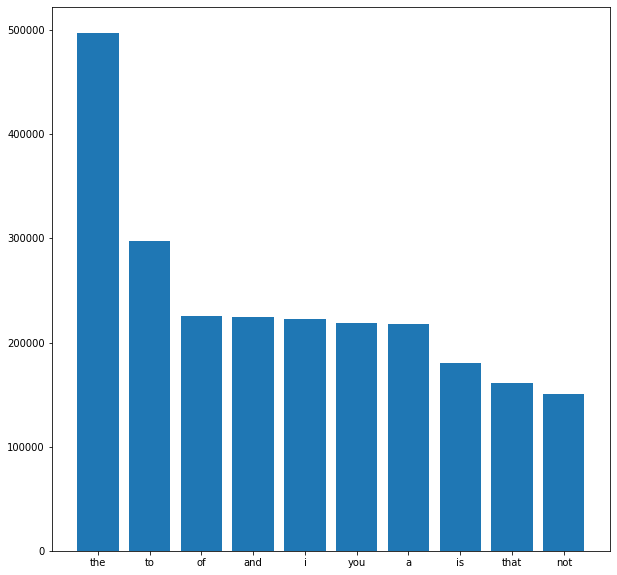

In [14]:
plot_top_stopwords_barchart(df_comments['text_cl'])

Какие слова популярны без учета стоп слов

In [15]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

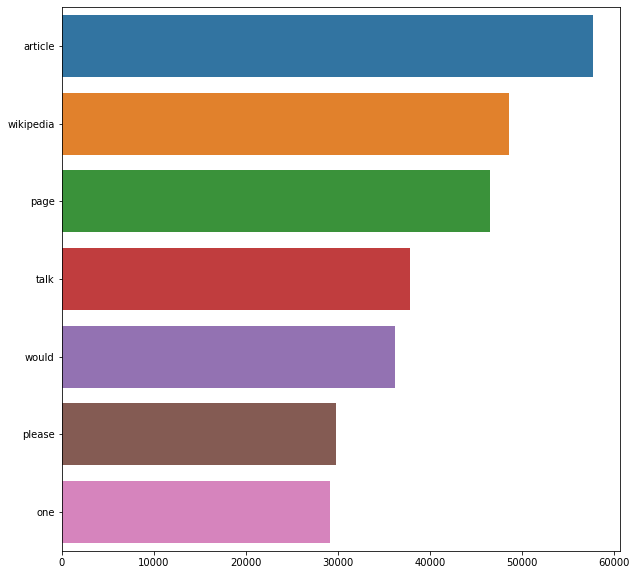

In [16]:
plot_top_non_stopwords_barchart(df_comments['text_cl'])

Стоп слова нам не нужны. Теперь уберем их

In [17]:
stop_words=set(stopwords.words('english'))

df_comments['text_tokenize'] = df_comments['text_cl'].apply(lambda x: [word for word in x.split() if word not in stop_words])
df_comments['text_tokenize_join'] = [' '.join(map(str, l)) for l in df_comments['text_tokenize']]

df_comments.head()

,text,toxic,text_cl,lemmatize,text_tokenize,text_tokenize_join
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edit make under my usernam...,"[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...,daww he match this background colour im seemin...,"[daww, matches, background, colour, im, seemin...",daww matches background colour im seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war it ju...,hey man im really not try to edit war it just ...,"[hey, man, im, really, trying, edit, war, guy,...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca not make any real suggestions on im...,more i ca not make any real suggestions on imp...,"[ca, make, real, suggestions, improvement, won...",ca make real suggestions improvement wondered ...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,you sir be my hero any chance you remember wha...,"[sir, hero, chance, remember, page]",sir hero chance remember page


In [18]:
# убьем лишние столбцы

df_comments.drop(['text','text_cl','lemmatize'], axis=1, inplace = True)

<div class="alert alert-block alert-info">
<b>Совет: </b> Ты плодишь очень много сущностей в процессе обработки. В учебном проекте это ОК, но в реальном у тебя может закончиться память.
</div>

Посмотрим на части речи, которые встречаются у нас в тексте.

In [19]:
tagged_stanzas_train = []

for word in df_comments['text_tokenize_join']:
    tagged_word = nltk.pos_tag(word.split())
    tagged_stanzas_train.append(tagged_word)

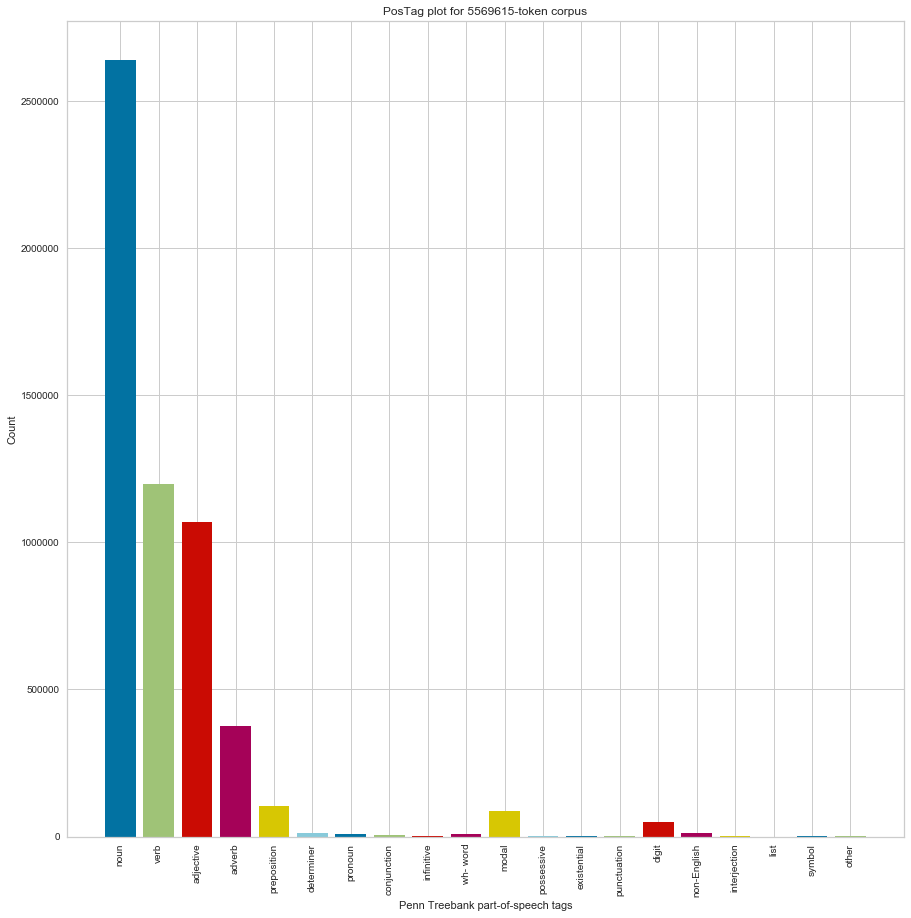

In [20]:
tagged_train = []
tagged_train.append(tagged_stanzas_train)

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_train)
viz.show()

del tagged_train

Сделаем features

In [21]:
features = df_comments['text_tokenize_join']
target = df_comments['toxic']

# проверяем размер
features.shape, target.shape

((159571,), (159571,))

In [22]:
#разбиваем на train и остальное. стратифицируем
features_train, features_other, target_train, target_other = train_test_split(features, target , test_size=0.40, 
                                                                              random_state=515093, stratify = target)


#разбиваем на валид и тест. стратифицируем
features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other , test_size=0.50, 
                                                                              random_state=515093, stratify = target_other)

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было напечатать размеры полученных наборов.
</div>

In [23]:
# векторизируем
count_vect = CountVectorizer()
count_vect.fit(features_train)

features_train = count_vect.transform(features_train)
features_valid = count_vect.transform(features_valid)
features_test = count_vect.transform(features_test)

In [24]:
# транформируем 

tans = TfidfTransformer()
tans.fit(features_train)

features_train = tans.transform(features_train)
features_valid = tans.transform(features_valid)
features_test = tans.transform(features_test)

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что векторизатор был обучен только на тренировочной части.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было сразу использовать TfidfVectorizer.
</div>

In [25]:
# сделаем апсемплинг для трейнинговых данных
ros = RandomOverSampler(random_state=42, sampling_strategy = 'auto')
features_train_up, target_train_up = ros.fit_resample(features_train, target_train)

target_train_up = np.array(target_train_up)

print('Кейсы %s' % Counter(target_train_up))

Кейсы Counter({0: 86007, 1: 86007})


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что ты обратила внимание не дисбаланс классов.
</div>

<a name="2."></a><br/>
<font size="6"><b>2. Обучение</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Рассморим несколько моделей

In [26]:
cv = StratifiedKFold(n_splits=3, random_state=1234, shuffle=True)

info = pd.DataFrame()

**RandomForestClassifier**

In [27]:
#Будем подбирать параметры гридсерчем

parameters = {'max_depth':[i for i in range(1,5,1)]}

clf = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state = 1234), param_grid = parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'max_depth': 1}


In [28]:
#обучем модель с лучшими параметрами.
model = RandomForestClassifier(n_jobs = -1, max_depth = 1, random_state = 1234)

In [29]:
#сделаем фунукцию, котрая будет записывать параметры
def put_in_base(base_res, model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    target = target_test
    features = features_test
    predictions = model.predict(features)
    accuracy, precision, recall, f1 , Roc = [], [], [], [],[]
    accuracy.append(accuracy_score(target, predictions))
    precision.append(precision_score(target, predictions))
    recall.append(recall_score(target, predictions))
    f1.append(f1_score(target, predictions))

    #probabilities = model.predict_proba(features)
    #Roc.append(roc_auc_score(target, probabilities[:, 1]))

    #print(classification_report(target, predictions))
    base_res.loc[str(model).split('(')[0],'accuracy'] = np.mean(accuracy)
    base_res.loc[str(model).split('(')[0],'precision'] = np.mean(precision)
    base_res.loc[str(model).split('(')[0],'recall'] = np.mean(recall)
    base_res.loc[str(model).split('(')[0],'f1'] = np.mean(f1)
    #base_res.loc[str(model).split('(')[0],'Roc'] = np.mean(Roc)

    return base_res, predictions

In [30]:
# Выведем графиики для наглядности
def param_bars(base_name, name):
    sns.set(style="whitegrid")
    plt.figure(figsize = (10,3)) 
    df = base_name
    sns.barplot(data=df, palette="tab20", linewidth=2.5)
    plt.title("Показатель эффективности модели - " + str(name), fontsize=15)
    plt.ylabel("%%")
    plt.xlabel("Параметры")
    plt.ylim((0, 1.2)) 
    c = 0
    for i in df.columns:
        plt.text( c - 0.1 , df[i].mean() + 0.1, "{0:.0%}".format(df[i].mean()))
        c = c + 1
    plt.show()

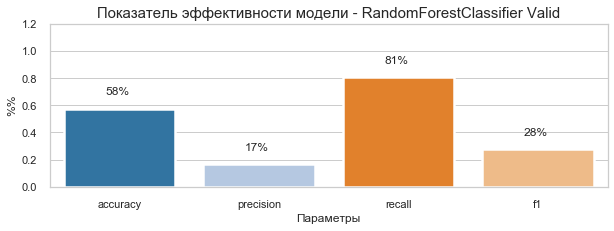

In [31]:
info, predictions = put_in_base(info, model, features_train_up, target_train_up, features_valid, target_valid)
param_bars(info[info.index == 'RandomForestClassifier'],'RandomForestClassifier Valid')

Дерево дает плохие результаты F1

**PassiveAggressiveClassifier**

In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(PassiveAggressiveClassifier( random_state = 1234), param_grid, scoring = 'f1')

clf.fit(features_train_up, target_train_up)
print(clf.best_params_)

{'C': 1}


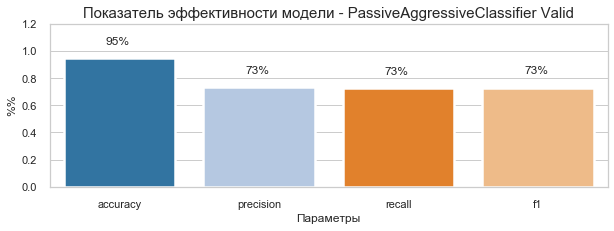

In [33]:
model = PassiveAggressiveClassifier(n_jobs = -1, C = 1, random_state = 1234)

info, predictions = put_in_base(info, model, features_train_up, target_train_up, features_valid, target_valid)
param_bars(info[info.index == 'PassiveAggressiveClassifier'],'PassiveAggressiveClassifier Valid')

Линейная модель PassiveAggressiveClassifier дает результаты лучше

**LogisticRegression**

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2', random_state = 1234), param_grid, scoring = 'f1')

clf.fit(features_train_up, target_train_up)
print(clf.best_params_)

{'C': 1000}


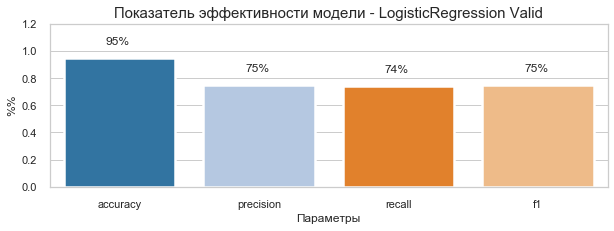

In [35]:
model = LogisticRegression( n_jobs = -1, C = 1000, random_state = 1234, penalty='l2')
info, predictions = put_in_base(info, model, features_train_up, target_train_up, features_valid, target_valid)
param_bars(info[info.index == 'LogisticRegression'],'LogisticRegression Valid')

LogisticRegression дает достаточныо высокий показатель.

<div class="alert alert-block alert-success">
<b>Успех:</b> В целом, все сделано хорошо и корректно. Радует, что ты не забыла про подбор парамтеров.
</div>

<a name="3."></a><br/>
<font size="6"><b>3. Тестирование и Проверка модели на адекватность</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

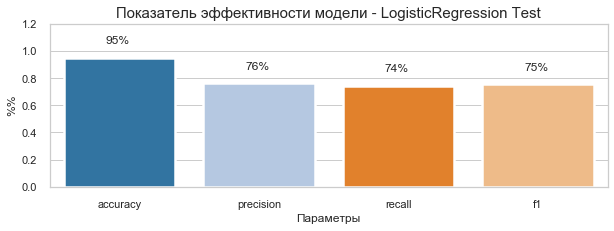

In [36]:
# тестирование

model = LogisticRegression( n_jobs = -1, C = 1000, random_state = 1234, penalty='l2')

info, predictions = put_in_base(info, model, features_train_up, target_train_up, features_test, target_test)
param_bars(info[info.index == 'LogisticRegression'],'LogisticRegression Test')

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено абсолютно корректно. Молодец!
</div>

* Проверим модель на адекватнось глазами. Посмотрим на доли toxic. 

In [37]:
print(bold(),"% Toxic in test sample: target",colored(round(target_test.mean(),3),'blue')+bold(),"VS predictions",
      colored(round(predictions.mean() ,3),'blue'),bold_end())

 % Toxic in test sample: target 0.102 VS predictions 0.099 


Предсказанная доля положительного класса сильно не отличается от таргет

* Сравним c дамми

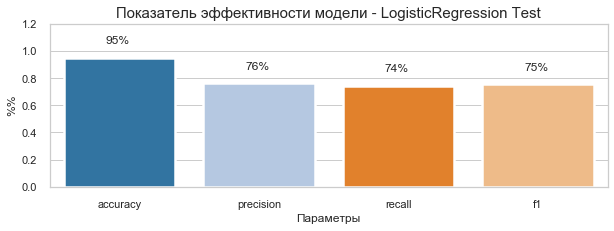

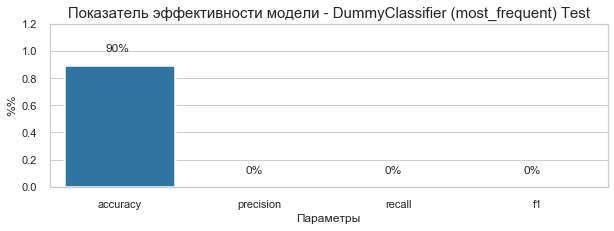

In [38]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train_up, target_train_up)

dummy_clf_test = pd.DataFrame()
dummy_clf_test, d_pr = put_in_base(dummy_clf_test, dummy_clf, features_train_up, target_train_up, features_test, target_test)

param_bars(info[info.index == 'LogisticRegression'],'LogisticRegression Test')
param_bars(dummy_clf_test[dummy_clf_test.index == 'DummyClassifier'],'DummyClassifier (most_frequent) Test')

Дамми дает меньшую точность и F1.

* Посмотрим на ROC кривую.

 ROC - 0.95 


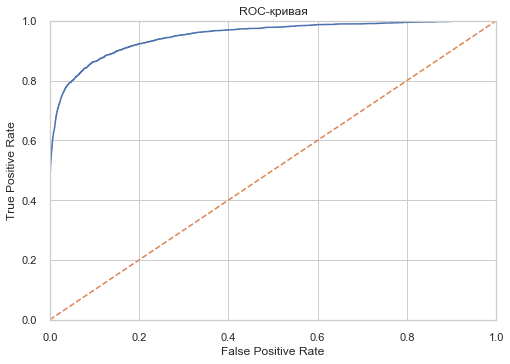

In [39]:
probabilities_test = model.predict_proba(features_test)

print(bold(),'ROC -', round(roc_auc_score(target_test, probabilities_test[:, 1]),2), bold_end())

fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Высокий показатель ROC - 0.95

<div class="alert alert-block alert-success">
<b>Успех:</b> Меня очень порадовало, что ты проанализировала модель с помощью другие метрик и не забыла про проверку на адекватность.
</div>

<a name="5."></a><br/>
<font size="6"><b>Вывод</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

**На основе данных интернет-магазина «Викишоп», была построена модель для задачи классификации токсичности комментария, которая прогнозирует токсичные комментарии для того, чтобы отправить их на модерацию.**

**Необходимо построить модель, со значением F1-меры от 0.75 и более. Наша модель на тестовой выборке имеет F1-меру 0.75.**

* При обработке тестовых данных:
    * Данные приведены к нижнему регистру
    * Сокращенные слова были заменены на полные
    * Оставлены только латинские знаки 
    * Лемматизированы с помощью WordNetLemmatizer
    * Убраны 'стоп слова' (на основе nltk.corpus.stopwords.words('english'))
    * Векторизированы с помощью CountVectorizer
    * Обработаны с помощью TfidfTransformer
    
 
* При обучении модели потребовалась ребалансировка классов. Ребалансировка была произведена через RandomOverSampler.
    
**Классификация производится с помощью "Random Forest Classifier", c параметрами :**
* penalty= l2
* C = 1000
* random_state = 1234

**Кодирование результатов:**
<font color='blue'> 
* **0 - НЕ выявлено, что комментарий токсичен**
* **1 - Токсичный комментарий**

<a name="6."></a><br/>
<font size="6"><b>Приложение. А как же BERT?</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)





Обработка данных по данной схеме занимает много ресурсов. Поэтому в рамках эксперимента возьмем только часть выборки (3000 строк). 

Возьмем данные уже избавленные от стоп слов и не латиницы.

In [40]:
#Определим берта
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

#Загрузим pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [41]:
#Выделим нашу выборку в 3000 сторок
batch_1 = df_comments['text_tokenize_join'][:3000]
target_bert = df_comments['toxic'][:3000]

In [42]:
#Токинизируем.  Отрежем конец комментария, если он слишком длинный
tokenized = batch_1.apply(lambda x: tokenizer.encode(x[:512], add_special_tokens=True))

In [43]:
#найдем максимум
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

In [44]:
#соберем аррей по максимально длинне
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

#создадим маску
attention_mask = np.where(padded != 0, 1, 0)

In [45]:
#кусочками по 100 обработаем

batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

In [46]:
# соединим в features
features_bert = np.concatenate(embeddings)

In [47]:
# проверим размерность
features_bert.shape , target_bert.shape

((3000, 768), (3000,))

In [48]:
#разбиваем на train и валид. стратифицируем
features_train_bert, features_valid_bert, target_train_bert, target_valid_bert = train_test_split(features_bert, target_bert , test_size=0.25, 
                                                                              random_state=515093, stratify = target_bert)


In [49]:
# находим лучшие параметры, не забываем что у нас дисбаланс классов (class_weight = 'balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2', class_weight = 'balanced', random_state = 1234), param_grid, scoring = 'f1')

clf.fit(features_train_bert, target_train_bert)
print(clf.best_params_)

{'C': 1}


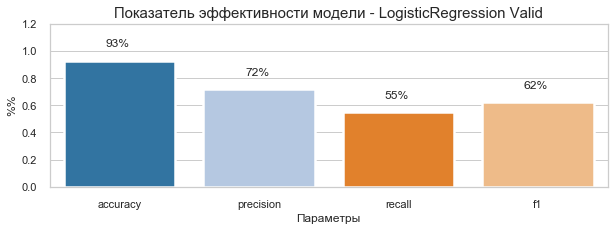

In [50]:
# Проверяем на валидной выборке
info_b = pd.DataFrame()

lr_clf = LogisticRegression( n_jobs = -1, C = 1, random_state = 1234, penalty='l2', class_weight = 'balansed')
info, predictions = put_in_base(info_b, lr_clf, features_train_bert, target_train_bert, features_valid_bert,
                                target_valid_bert)
param_bars(info_b[info_b.index == 'LogisticRegression'],'LogisticRegression Valid')

## Вывод:

Удалось обработать данные методом BERT, на части выборки, и в результате получить F1 - 0.62.

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны